## 0. Install Dependencies

In [2]:
!pip install numpy
!pip install tensorflow
!pip install gym
!pip install keras
!pip install keras-rl2
!pip install pandas
!pip install torch
!pip install torchvision

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


**Some plotting functions from** [plotting repo](https://github.com/dennybritz/reinforcement-learning/blob/master/lib/plotting.py)

In [4]:
import matplotlib
import numpy as np
import pandas as pd
from collections import namedtuple
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

EpisodeStats = namedtuple("Stats",["episode_lengths", "episode_rewards"])

def plot_cost_to_go_mountain_car(env, estimator, num_tiles=20):
    x = np.linspace(env.observation_space.low[0], env.observation_space.high[0], num=num_tiles)
    y = np.linspace(env.observation_space.low[1], env.observation_space.high[1], num=num_tiles)
    X, Y = np.meshgrid(x, y)
    Z = np.apply_along_axis(lambda _: -np.max(estimator.predict(_)), 2, np.dstack([X, Y]))

    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                           cmap=matplotlib.cm.coolwarm, vmin=-1.0, vmax=1.0)
    ax.set_xlabel('Position')
    ax.set_ylabel('Velocity')
    ax.set_zlabel('Value')
    ax.set_title("Mountain \"Cost To Go\" Function")
    fig.colorbar(surf)
    plt.show()


def plot_value_function(V, title="Value Function"):
    """
    Plots the value function as a surface plot.
    """
    min_x = min(k[0] for k in V.keys())
    max_x = max(k[0] for k in V.keys())
    min_y = min(k[1] for k in V.keys())
    max_y = max(k[1] for k in V.keys())

    x_range = np.arange(min_x, max_x + 1)
    y_range = np.arange(min_y, max_y + 1)
    X, Y = np.meshgrid(x_range, y_range)

    # Find value for all (x, y) coordinates
    Z_noace = np.apply_along_axis(lambda _: V[(_[0], _[1], False)], 2, np.dstack([X, Y]))
    Z_ace = np.apply_along_axis(lambda _: V[(_[0], _[1], True)], 2, np.dstack([X, Y]))

    def plot_surface(X, Y, Z, title):
        fig = plt.figure(figsize=(20, 10))
        ax = fig.add_subplot(111, projection='3d')
        surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                               cmap=matplotlib.cm.coolwarm, vmin=-1.0, vmax=1.0)
        ax.set_xlabel('Player Sum')
        ax.set_ylabel('Dealer Showing')
        ax.set_zlabel('Value')
        ax.set_title(title)
        ax.view_init(ax.elev, -120)
        fig.colorbar(surf)
        plt.show()

    plot_surface(X, Y, Z_noace, "{} (No Usable Ace)".format(title))
    plot_surface(X, Y, Z_ace, "{} (Usable Ace)".format(title))



def plot_episode_stats(stats, smoothing_window=10, noshow=False):
    # Plot the episode length over time
    fig1 = plt.figure(figsize=(10,5))
    plt.plot(stats.episode_lengths)
    plt.plot(simple_moving_average(stats.episode_lengths))
    plt.xlabel("Episode")
    plt.ylabel("Episode Length")
    plt.title("Episode Length over Time")
    if noshow:
        plt.close(fig1)
    else:
        plt.show(fig1)

    # Plot the episode reward over time
    fig2 = plt.figure(figsize=(10,5))
    plt.plot(pd.Series(stats.episode_rewards).rolling(smoothing_window, min_periods=smoothing_window).mean())
    plt.plot(simple_moving_average(stats.episode_rewards))
    plt.xlabel("Episode")
    plt.ylabel("Episode Reward (Smoothed)")
    plt.title("Episode Reward over Time (Smoothed over window size {})".format(smoothing_window))
    if noshow:
        plt.close(fig2)
    else:
        plt.show(fig2)

    # Plot time steps and episode number
    fig3 = plt.figure(figsize=(10,5))
    plt.plot(np.cumsum(stats.episode_lengths), np.arange(len(stats.episode_lengths)))
    plt.xlabel("Time Steps")
    plt.ylabel("Episode")
    plt.title("Episode per time step")

    if noshow:
        plt.close(fig3)
    else:
        plt.show(fig3)

    return fig1, fig2, fig3


def plot_history_stats(history, smoothing_window=10, noshow=False):
    # Get rewards
    episode_lengths = history.history['nb_episode_steps']
    episode_rewards = history.history['episode_reward']

    # Keeps track of useful statistics
    stats = EpisodeStats(episode_lengths = episode_lengths, 
                         episode_rewards = episode_rewards)   

    # Plot the episode length over time
    fig1 = plt.figure(figsize=(10,5))
    plt.plot(stats.episode_lengths)
    plt.plot(simple_moving_average(stats.episode_lengths))
    plt.xlabel("Episode")
    plt.ylabel("Episode Length")
    plt.title("Episode Length over Time")
    if noshow:
        plt.close(fig1)
    else:
        plt.show(fig1)

    # Plot the episode reward over time
    fig2 = plt.figure(figsize=(10,5))
    plt.plot(pd.Series(stats.episode_rewards).rolling(smoothing_window, min_periods=smoothing_window).mean())
    plt.plot(simple_moving_average(stats.episode_rewards))
    plt.xlabel("Episode")
    plt.ylabel("Episode Reward (Smoothed)")
    plt.title("Episode Reward over Time (Smoothed over window size {})".format(smoothing_window))
    if noshow:
        plt.close(fig2)
    else:
        plt.show(fig2)

    # Plot time steps and episode number
    fig3 = plt.figure(figsize=(10,5))
    plt.plot(np.cumsum(stats.episode_lengths), np.arange(len(stats.episode_lengths)))
    plt.xlabel("Time Steps")
    plt.ylabel("Episode")
    plt.title("Episode per time step")

    if noshow:
        plt.close(fig3)
    else:
        plt.show(fig3)

    return fig1, fig2, fig3



def simple_moving_average(arr):
    i = 1
    # Initialize an empty list to store cumulative moving
    # averages
    moving_averages = []

    # Store cumulative sums of array in cum_sum array
    cum_sum = np.cumsum(arr)

    # Loop through the array elements
    while i <= len(arr):
        # Calculate the cumulative average by dividing
        # cumulative sum by number of elements till 
        # that position
        window_average = round(cum_sum[i - 1] / i, 2)

        # Store the cumulative average of
        # current window in moving average list
        moving_averages.append(window_average)

        # Shift window to right by one position
        i += 1

    return moving_averages

## 1. Test Random Environment with OpenAI Gym

In [117]:
from gym import Env, utils
from gym.spaces import Box, Discrete, Tuple
import numpy as np
import random

# default
NUM_ROWS = 10
NUM_COLUMNS = 10
NUM_MINES = 9
SEED = 123

# cell values, non-negatives indicate number of neighboring mines
MINE = -1
CLOSED = -2
OPEN = 0


def int_to_char(i: int) -> chr:
    return chr(ord('@') + i + 1)


class MinesweeperEnv(Env):
    metadata = {"render.modes": ["ansi", "human"]}

    def __init__(self, rows: int = NUM_ROWS, cols: int = NUM_COLUMNS, mines: int = NUM_MINES):
        """
        Create a minesweeper game
        :param rows: number of the board rows
        :param cols: number of the board columns
        :param mines: num mines on the board
        """
        self.observation_space = Box(low=-2, high=9, shape=(rows, cols), dtype=np.int8)
        self.action_space = Tuple((Discrete(rows), Discrete(cols)))
        self.actions = []
        self.max_steps = (rows * cols) - 1

        self.rows = rows
        self.cols = cols
        self.mines = mines

        self.reset()

    def count_surrounding_tiles(self, state: np.array, tile: int, x: int, y: int):
        """
        Return number of specific tiles in neighbour cells given an x-y coordinate
        :param state: visible board
        :param tile: tile type
        :param x: location
        :param y: location
        :return: int number of tiles
        """
        neighbour_tiles = 0
        for _x in range(x - 1, x + 2):
            for _y in range(y - 1, y + 2):
                if (_x >= 0) & (_x < self.rows) & (_y >= 0) & (_y < self.cols):
                    if state[_x, _y] == tile:
                        neighbour_tiles += 1
        return neighbour_tiles

    def open_surrounding_tiles(self, state: np.array, x: int, y: int):
        """
        Return number of mines in neighbour cells given an x-y coordinate
        :param state: visible board
        :param x: location
        :param y: location
        :return: next visible board
        """
        for _x in range(x - 1, x + 2):
            for _y in range(y - 1, y + 2):
                if (_x >= 0) & (_x < self.rows) & (_y >= 0) & (_y < self.cols):
                    if state[_x, _y] == CLOSED:
                        state[_x, _y] = self.count_surrounding_tiles(self.board, MINE, _x, _y)
                        if state[_x, _y] == OPEN:
                            state = self.open_surrounding_tiles(state, _x, _y)
        return state

    def get_next_state(self, state: np.array, x: int, y: int):
        """
        Get the next state
        :param state: visible board
        :param x: location
        :param y: location
        :return: next visible board and bool true if game over
        """
        game_over = False
        if self.board[x, y] == MINE:
            state[x, y] = MINE
            game_over = True
        else:
            state[x, y] = self.count_surrounding_tiles(self.board, MINE, x, y)
            if state[x, y] == OPEN:
                state = self.open_surrounding_tiles(state, x, y)
        self.current_board = state
        return state, game_over

    def next_step(self, state: np.array, x: int, y: int):
        """
        Get the next observation, reward and done status
        :param state: visible board
        :param x: location
        :param y: location
        :return: str of next visible board, the reward float, bool whether the game end or not
        """
        if self.max_steps == len(self.actions):
            return state, -100, True
        
        if state[x, y] != CLOSED:
            return state, -1, False
        while True:
            #unknown = self.count_surrounding_tiles(state, CLOSED, x, y)
            state, game_over = self.get_next_state(state, x, y)
            if not game_over:
                if np.count_nonzero(state == CLOSED) == self.mines:
                    return state, 1000, True
                else:
                    return state, 10, False
            else:
                return state, -100, True

    def reset(self):
        """
        Resets the environment to an initial state and returns an initial observation. See gym.Env.reset()
        :return: the next board
        """
        self.board = np.zeros((self.rows, self.cols), dtype=np.int8)
        self.current_board = np.ones((self.rows, self.cols), dtype=np.int8) * CLOSED
        self.valid_actions = np.ones((self.rows, self.cols), dtype=np.bool8)
        self.actions.clear()

        mines_placed = 0
        while mines_placed < self.mines:
            rnd = random.randint(0, (self.rows * self.cols) - 1)
            x = int(rnd / self.rows)
            y = int(rnd % self.cols)
            if (x >= 0) & (x < self.rows) & (y >= 0) & (y < self.cols):
                if self.board[x, y] != MINE:
                    self.board[x, y] = MINE
                    mines_placed += 1
        return self.current_board

    def step(self, action):
        """
        Run one timestep of the environment's dynamics. See gym.Env.step()
        :param action: location index at 2d matrix
        :return: the reward for action, whether the game end or not and info
        """
        if isinstance(action, tuple):
            x = int(action[0])
            y = int(action[1])
        else:
            x = int(action / self.rows)
            y = int(action % self.cols)

        # test valid action
        if self.valid_actions[x, y] is False:
            raise Exception("Invalid action was selected! Action Filter: {}, "
                            "action taken: {}".format(self.valid_actions, action))

        next_state, reward, done = self.next_step(self.current_board, x, y)

        self.current_board = next_state
        self.valid_actions = (next_state == CLOSED)
        self.actions.append([x, y])

        # info['valid_actions'] = self.valid_actions.flatten()
        # info['num_actions'] = len(self.actions)

        return next_state, reward, done, {}

    def render(self, mode='human'):
        """
        Renders the environment. See gym.Env.render()
        """
        full_repr = ""
        for x in range(self.rows):
            full_repr += int_to_char(x)
            for y in range(self.cols):
                if self.current_board[x, y] == MINE:
                    full_repr += ' ' + utils.colorize('×', "red", highlight=True)
                elif self.current_board[x, y] == CLOSED:
                    full_repr += ' ▓'
                elif self.current_board[x, y] == OPEN:
                    if [x, y] in self.actions:
                        full_repr += ' ' + utils.colorize('░', "yellow", highlight=True)
                    else:
                        full_repr += ' ░'
                else:
                    char = '%s' % int(self.current_board[x, y])
                    if [x, y] in self.actions:
                        full_repr += ' ' + utils.colorize(char, "yellow", highlight=True)
                    else:
                        full_repr += ' ' + char
                if y != self.cols - 1:
                    full_repr += ' '
                    if y == (self.cols - 1):
                        full_repr += '\n'
            full_repr += '\n'
        full_repr += ' '
        for y in range(self.cols):
            full_repr += (' %s ' % y)
        full_repr += '\n'
        if mode == 'human':
            print(full_repr)
        return full_repr

In [118]:
np.random.seed(123)
random.seed(123)

env = MinesweeperEnv(rows = 5, cols = 5, mines = 2)

states = env.observation_space.shape
actions = env.action_space[0].n * env.action_space[1].n
max_steps = env.observation_space.shape[0] * env.observation_space.shape[1]

train_episodes = 10000

## 2. Brute Force Approach

**Single try**

In [119]:
from IPython.display import clear_output
import time

steps = 0
penalties, rewards = 0, 0
frames = []
clear_output(wait=True)
state = env.reset()
env.render()

print(state)

while True:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)
    if reward <= -10:
        penalties += 1

    # Update render
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
    })

    rewards += reward
    steps += 1
    if done:
        break

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print("Timestep: {}".format(i + 1))
        print("State:")
        print(frame['state'])
        print("Action: {}".format(frame['action']))
        print("Reward: {}".format(frame['reward']))
        time.sleep(0.5)

print_frames(frames)

print("")
print("Steps taken for Brute Force:")
for a in env.actions:
    print((int_to_char(a[0]), a[1]))
print("Timesteps taken for Brute Force: {}".format(steps))
print("Rewards collected for Brute Force: {}".format(rewards))
print("Penalties incurred for Brute Force: {}".format(penalties))

A ░  1  ▓  1  ░
B ░  1  1  1  ░
C ░  ░  ░  ░  ░
D ░  ░  ░  1  1
E ░  ░  ░  1  ▓
  0  1  2  3  4 

Timestep: 1
State:
[[ 0  1 -2  1  0]
 [ 0  1  1  1  0]
 [ 0  0  0  0  0]
 [ 0  0  0  1  1]
 [ 0  0  0  1 -2]]
Action: (2, 1)
Reward: 1000

Steps taken for Brute Force:
('C', 1)
Timesteps taken for Brute Force: 1
Rewards collected for Brute Force: 1000
Penalties incurred for Brute Force: 0


In [120]:
def brute_force(env, num_episodes, max_steps=100):
    # Keeps track of useful statistics
    stats = EpisodeStats(episode_lengths=np.zeros(num_episodes),
                         episode_rewards=np.zeros(num_episodes))

    # Creating lists to keep track of reward and epsilon values
    training_rewards = []

    for episode in range(num_episodes):
        # Reseting the environment each time as per requirement
        env.reset()

        # Starting the tracker for the rewards
        total_training_rewards = 0

        for step in range(max_steps):
            action = env.action_space.sample()
            _, reward, done, _ = env.step(action)

            # Update statistics
            stats.episode_rewards[episode] += reward
            stats.episode_lengths[episode] = step

            # Increasing our total reward and updating the state
            total_training_rewards += reward

            # Ending the episode
            if done:
                break

        # Adding the total reward
        training_rewards.append(total_training_rewards)

    return stats, training_rewards

In [121]:
stats, rewards = brute_force(env, num_episodes=train_episodes, max_steps=max_steps)

print ("Score over time: " + str(sum(rewards) / train_episodes))

Score over time: 167.8054


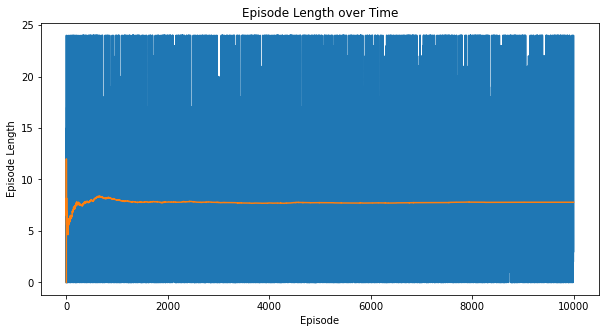

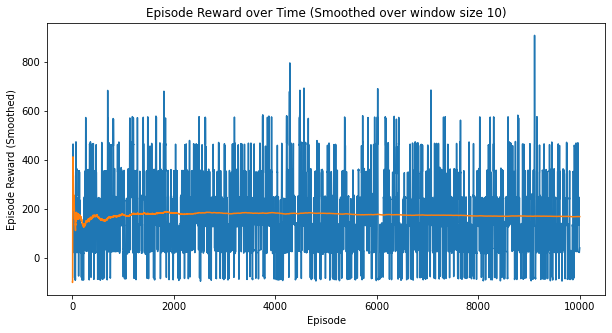

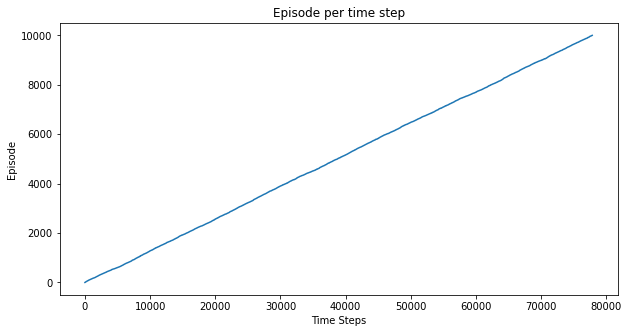

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [122]:
plot_episode_stats(stats)

## 3. Create Q Learning Model

In [123]:
import random
from collections import defaultdict

def qLearning(env, num_episodes, max_steps=100, discount_factor=1.0, alpha=0.6, epsilon=0.1, decay=0.01, max_epsilon=1, min_epsilon=0.01):
    # STEP 1 - Initializing the Q-table
    Q = defaultdict(lambda: np.zeros(env.action_space[0].n * env.action_space[1].n))
    
    # Keeps track of useful statistics
    stats = EpisodeStats(episode_lengths=np.zeros(num_episodes),
                         episode_rewards=np.zeros(num_episodes))
    
    # Training the agent
    
    # Creating lists to keep track of reward and epsilon values
    training_rewards = []
    epsilons = []
    
    for episode in range(num_episodes):
        # Reseting the environment each time as per requirement
        state = str(env.reset().flatten()).replace(" ", "")
        # Starting the tracker for the rewards
        total_training_rewards = 0
    
        for step in range(max_steps):
            # Choosing an action given the states based on a random number
            exp_exp_tradeoff = random.uniform(0, 1)
    
            ### STEP 1: SECOND option for choosing the initial action - exploit     
            # If the random number is larger than epsilon: employing exploitation 
            # and selecting best action 
    
            if exp_exp_tradeoff > epsilon:
                action = np.argmax(Q[state])
    
            ### STEP 2: FIRST option for choosing the initial action - explore       
            # Otherwise, employing exploration: choosing a random action 
            else:
                rnd = env.action_space.sample()  # [x, y]
                action = env.cols * rnd[0] + rnd[1]  # convert 2d to 1d as [x, y] -> id
    
            ### STEPs 3 & 4: performing the action and getting the reward     
            # Taking the action and getting the reward and outcome state
            ns, reward, done, info = env.step(action)
            next_state = str(ns.flatten()).replace(" ", "")  # convert array to string for hashing
    
            # Update statistics
            stats.episode_rewards[episode] += reward
            stats.episode_lengths[episode] = step
    
            ### STEP 5: update the Q-table
            # Updating the Q-table using the Bellman equation
            # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
    
            # Update state at action index if it already exists
            Q[state][action] = Q[state][action] + alpha * (reward + discount_factor * np.max(Q[next_state]) - Q[state][action])
    
            # Increasing our total reward and updating the state
            total_training_rewards += reward
            state = next_state
    
            # Ending the episode
            if done == True:
                break
    
        # Cutting down on exploration by reducing the epsilon 
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay * episode)
    
        # Adding the total reward, total steps and reduced epsilon values
        training_rewards.append(total_training_rewards)
        epsilons.append(epsilon)
    
    return Q, stats, training_rewards, epsilons

In [124]:
qtable, stats, rewards, epsilons = qLearning(env, 
                                             num_episodes=train_episodes, 
                                             max_steps=max_steps, 
                                             discount_factor=0.9, 
                                             alpha=0.8, 
                                             epsilon=0.9,
                                             decay=0.01)

print ("Score over time: " + str(sum(rewards) / train_episodes))

Score over time: 679.7928


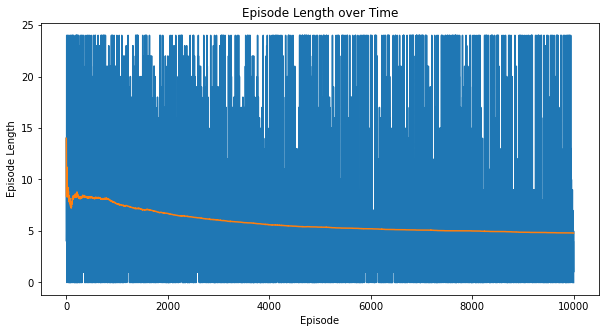

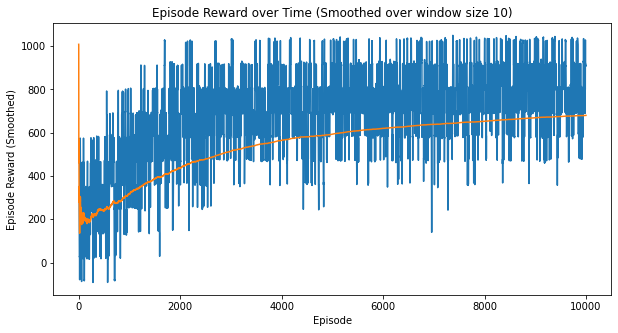

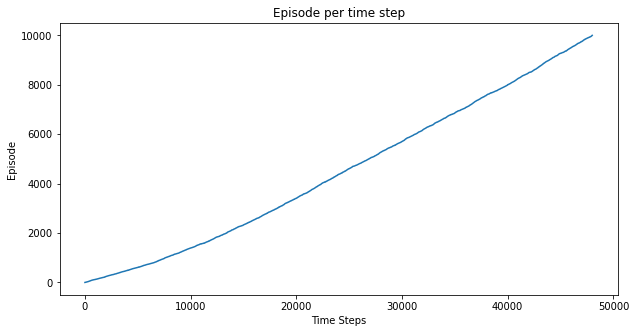

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [125]:
plot_episode_stats(stats)

In [126]:
qtable, stats, rewards, epsilons = qLearning(env, 
                                             num_episodes=train_episodes,
                                             max_steps=max_steps, 
                                             discount_factor=0.5, 
                                             alpha=0.7, 
                                             epsilon=0.15)

print ("Score over time: " + str(sum(rewards) / train_episodes))

Score over time: 672.2465


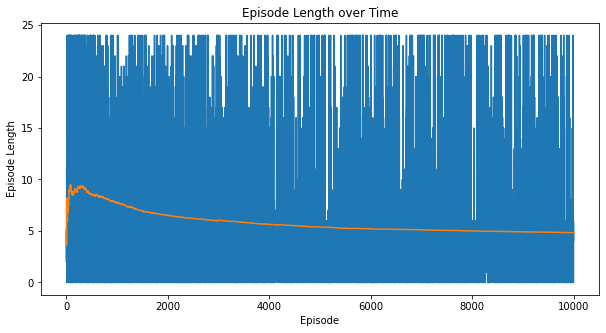

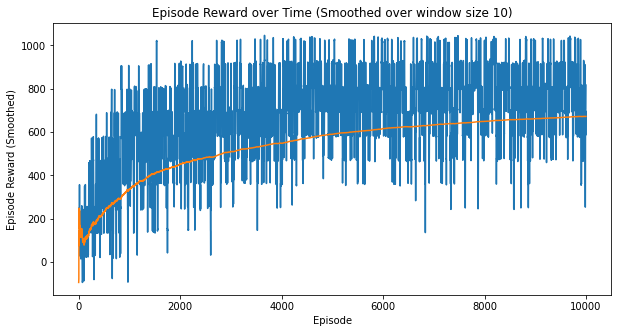

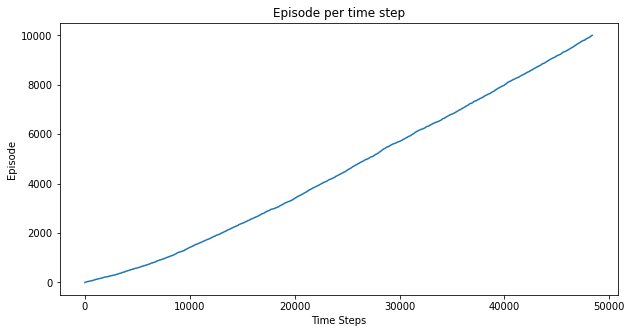

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [127]:
plot_episode_stats(stats)

In [128]:
qtable, stats, rewards, epsilons = qLearning(env, 
                                             num_episodes=train_episodes,
                                             max_steps=max_steps, 
                                             discount_factor=0.2, 
                                             alpha=0.2, 
                                             epsilon=0.9)

print ("Score over time: " + str(sum(rewards) / train_episodes))

Score over time: 678.2872


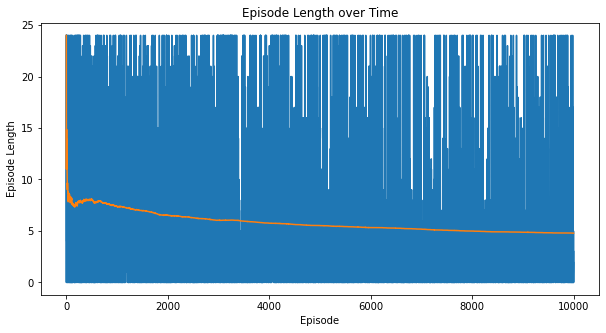

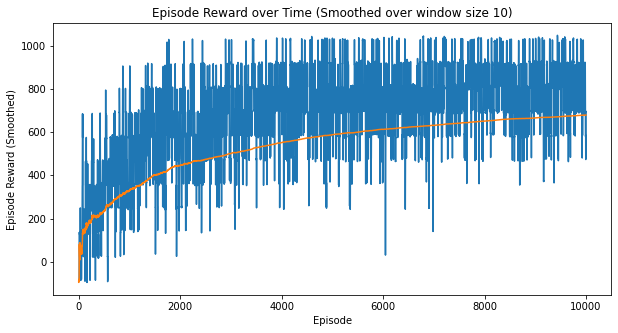

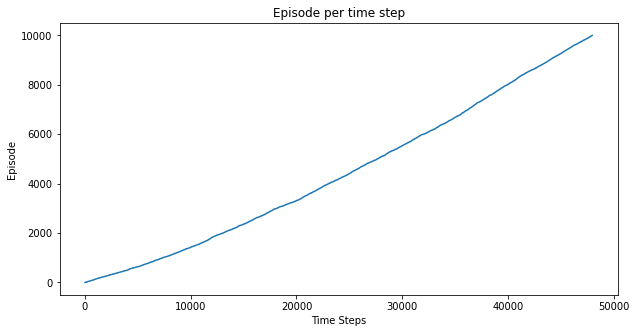

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [129]:
plot_episode_stats(stats)

In [130]:
qtable, stats, rewards, epsilons = qLearning(env, 
                                             num_episodes=train_episodes,
                                             max_steps=max_steps, 
                                             discount_factor=0.9, 
                                             alpha=0.8, 
                                             epsilon=0.9,
                                             decay=0.95)

print ("Score over time: " + str(sum(rewards) / train_episodes))

Score over time: 678.0683


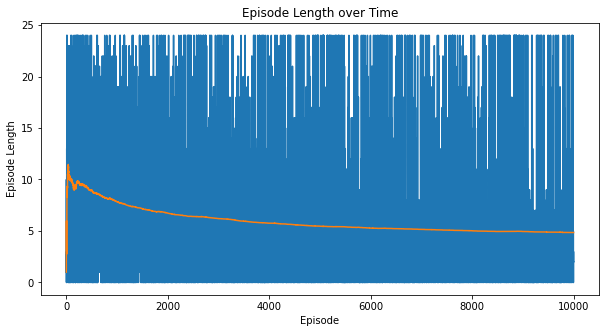

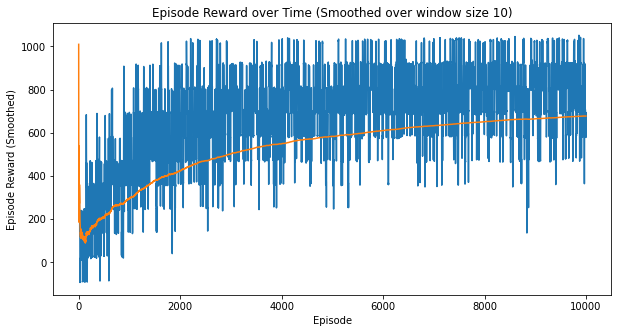

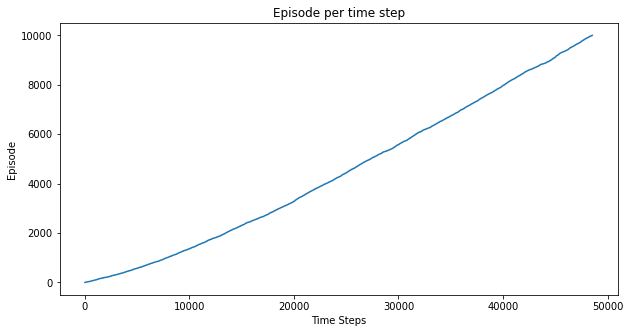

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [131]:
plot_episode_stats(stats)

## 4. Create a Deep Learning Model with Keras

In [96]:
from keras import Input
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Activation
from tensorflow.keras.optimizers import Adam
from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy, LinearAnnealedPolicy
from rl.memory import SequentialMemory

**DQN**

In [81]:
def dqn_model(states, dense):
    model = Sequential()
    model.add(Flatten(input_shape=np.insert(states, 0, 1)))
    model.add(Dense(dense))
    model.add(Activation('relu'))
    model.add(Dense(dense))
    model.add(Activation('relu'))
    model.add(Dense(dense))
    model.add(Activation('relu'))
    model.add(Dense(dense * 2))
    return model

In [82]:
dqn_model = dqn_model(states, actions / 2)
dqn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 25)                0         
                                                                 
 dense_36 (Dense)            (None, 12)                312       
                                                                 
 activation (Activation)     (None, 12)                0         
                                                                 
 dense_37 (Dense)            (None, 12)                156       
                                                                 
 activation_1 (Activation)   (None, 12)                0         
                                                                 
 dense_38 (Dense)            (None, 12)                156       
                                                                 
 activation_2 (Activation)   (None, 12)                0

In [83]:
def dqn_agent(model, actions):
    policy = EpsGreedyQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, 
                   nb_actions=actions, 
                   memory=memory, 
                   nb_steps_warmup=50000,
                   target_model_update=1e-3, 
                   policy=policy)
    return dqn

In [84]:
dqn_agent = dqn_agent(dqn_model, actions)
dqn_agent.compile(Adam(learning_rate=1e-3), metrics=['mae'])

In [85]:
dqn_history = dqn_agent.fit(env, nb_steps=100000, visualize=False, verbose=1)

Training for 100000 steps ...
Interval 1 (0 steps performed)
    1/10000 [..............................] - ETA: 29:42 - reward: 10.0000

/home/qubka/.local/lib/python3.10/site-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


10000/10000 [==============================] - 5s 474us/step - reward: 3.9412
581 episodes - episode_reward: 67.807 [-114.000, 1039.000]

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 4s 447us/step - reward: 3.6893
576 episodes - episode_reward: 64.068 [-114.000, 1026.000]

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 5s 468us/step - reward: 4.0061
565 episodes - episode_reward: 70.864 [-114.000, 1029.000]

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 5s 473us/step - reward: 2.5497
566 episodes - episode_reward: 45.097 [-114.000, 1019.000]

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 4s 440us/step - reward: 2.7389
555 episodes - episode_reward: 49.333 [-114.000, 1032.000]

Interval 6 (50000 steps performed)
10000/10000 [==============================] - 47s 5ms/step - reward: 6.1291
601 episodes - episode_reward: 101.997 [-114.000, 1026.000

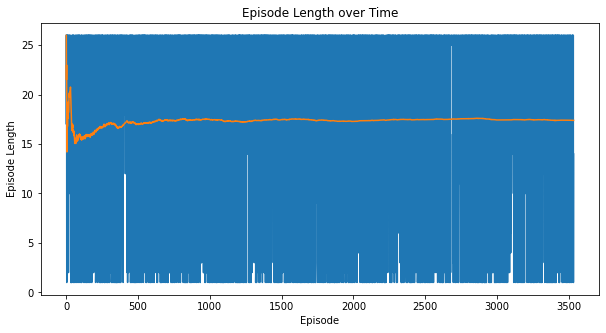

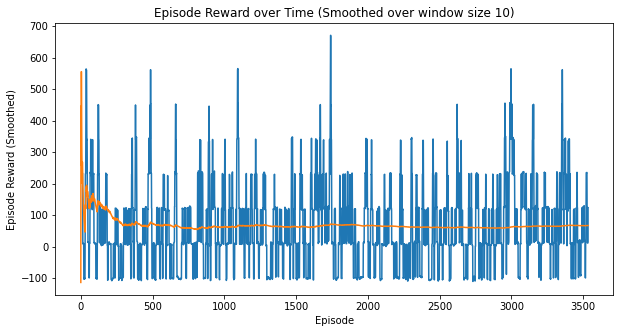

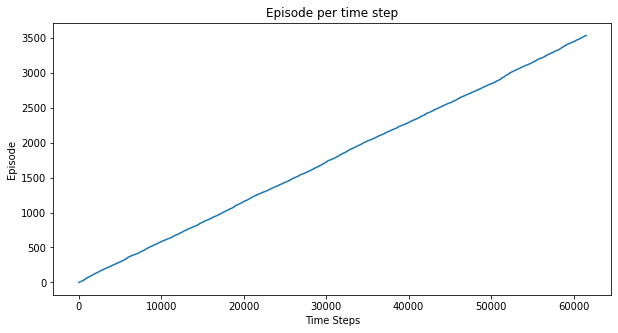

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [86]:
plot_history_stats(dqn_history)

**Double DQN**

In [97]:
def double_dqn_model(states, conv, dense):
    model = Sequential()
    model.add(Conv2D(conv, (3, 3), activation='relu', padding='same', input_shape=(np.insert(states, 0, 1))))
    model.add(Conv2D(2*conv, (3, 3), activation='relu', padding='same'))
    model.add(Flatten())
    model.add(Dense(dense, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(conv, activation='linear'))
    return model

In [98]:
double_dqn_model = double_dqn_model(states, actions, actions*4)
double_dqn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 1, 5, 25)          1150      
                                                                 
 conv2d_3 (Conv2D)           (None, 1, 5, 50)          11300     
                                                                 
 flatten_2 (Flatten)         (None, 250)               0         
                                                                 
 dense_46 (Dense)            (None, 100)               25100     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_47 (Dense)            (None, 25)                2525      
                                                      

In [99]:
def double_dqn_agent(model, actions):
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=0.005, value_test=0.05, nb_steps=1500000)
    memory = SequentialMemory(limit=1800000, window_length=1)
    dqn = DQNAgent(model=model,
               nb_actions=actions,
               policy=policy,
               memory=memory,
               nb_steps_warmup=50000,
               gamma=0.9, 
               target_model_update=1e-2,
               train_interval=4,
               delta_clip=1.0,
               enable_double_dqn=True,
              )
    return dqn

In [100]:
double_dqn_agent = double_dqn_agent(double_dqn_model, actions)
double_dqn_agent.compile(Adam(learning_rate=1e-3), metrics=['mae'])

In [101]:
double_dqn_history = double_dqn_agent.fit(env, nb_steps=100000, visualize=False, verbose=1)

Training for 100000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 7s 652us/step - reward: 15.8861
1095 episodes - episode_reward: 145.070 [-114.000, 1068.000]

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 7s 673us/step - reward: 18.3776
1187 episodes - episode_reward: 154.823 [-114.000, 1077.000]

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 6s 630us/step - reward: 16.5802
1109 episodes - episode_reward: 149.488 [-114.000, 1087.000]

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 7s 743us/step - reward: 15.4505
1111 episodes - episode_reward: 139.092 [-114.000, 1091.000]

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 8s 798us/step - reward: 16.9850
1145 episodes - episode_reward: 148.321 [-114.000, 1065.000]

Interval 6 (50000 steps performed)
10000/10000 [==============================] - 23s 2ms/step

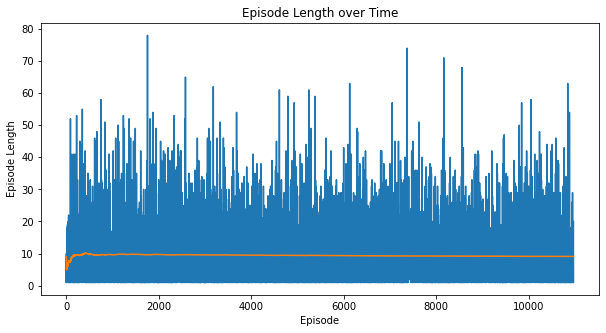

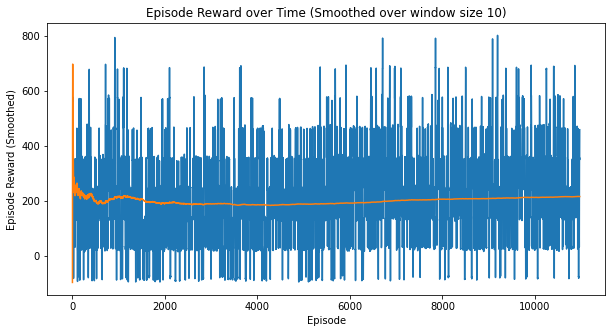

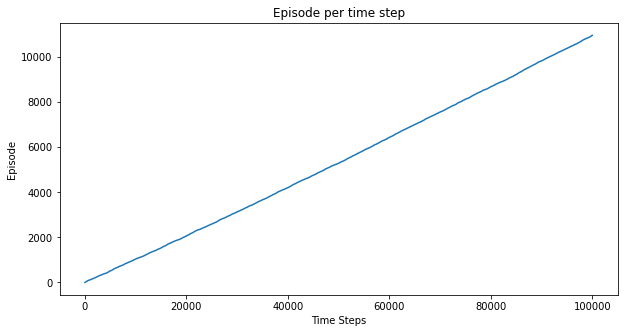

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [227]:
plot_history_stats(double_dqn_history)

**Dueling DQN**

In [228]:
def dueling_dqn_model(states, conv, dense):
    model = Sequential()
    model.add(Conv2D(conv, (3, 3), activation='relu', padding='same', input_shape=(np.insert(states, 0, 1))))
    model.add(Conv2D(2*conv, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(2*conv, (3, 3), activation='relu', padding='same'))
    model.add(Flatten())
    model.add(Dense(dense, activation='relu'))
    model.add(Dense(dense/2, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(conv, activation='linear'))
    return model

In [229]:
dueling_dqn_model = dueling_dqn_model(states, actions, actions*4)
dueling_dqn_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 1, 5, 25)          1150      
                                                                 
 conv2d_28 (Conv2D)          (None, 1, 5, 50)          11300     
                                                                 
 conv2d_29 (Conv2D)          (None, 1, 5, 50)          22550     
                                                                 
 flatten_18 (Flatten)        (None, 250)               0         
                                                                 
 dense_61 (Dense)            (None, 100)               25100     
                                                                 
 dense_62 (Dense)            (None, 50)                5050      
                                                                 
 batch_normalization_6 (Batc  (None, 50)             

In [230]:
def dueling_dqn_agent(model, actions):
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.005, value_test=0.05, nb_steps=1500000)
    memory = SequentialMemory(limit=1800000, window_length=1)
    dqn = DQNAgent(model=model,
               nb_actions=actions,
               policy=policy,
               memory=memory,
               nb_steps_warmup=50000,
               gamma=0.9, 
               target_model_update=1e-2,
               train_interval=4,
               delta_clip=1.0,
               enable_dueling_network=True,
               dueling_type='avg'
              )
    return dqn

In [231]:
dueling_dqn_agent = dueling_dqn_agent(dueling_dqn_model, actions)
dueling_dqn_agent.compile(Adam(learning_rate=1e-3), metrics=['mae'])

In [232]:
dueling_dqn_history = dueling_dqn_agent.fit(env, nb_steps=100000, visualize=False, verbose=1)

Training for 100000 steps ...
Interval 1 (0 steps performed)


/home/qubka/.local/lib/python3.10/site-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


10000/10000 [==============================] - 16s 2ms/step - reward: 19.6426
1117 episodes - episode_reward: 175.851 [-118.000, 1088.000]

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 15s 1ms/step - reward: 19.0376
1058 episodes - episode_reward: 179.935 [-147.000, 1077.000]

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 16s 2ms/step - reward: 18.3204
1056 episodes - episode_reward: 173.465 [-137.000, 1077.000]

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 16s 2ms/step - reward: 22.0131
1069 episodes - episode_reward: 205.950 [-134.000, 1094.000]

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 17s 2ms/step - reward: 16.5010
981 episodes - episode_reward: 168.204 [-123.000, 1058.000]

Interval 6 (50000 steps performed)
10000/10000 [==============================] - 27s 3ms/step - reward: 19.4237
1065 episodes - episode_reward: 182.377 [-135.00

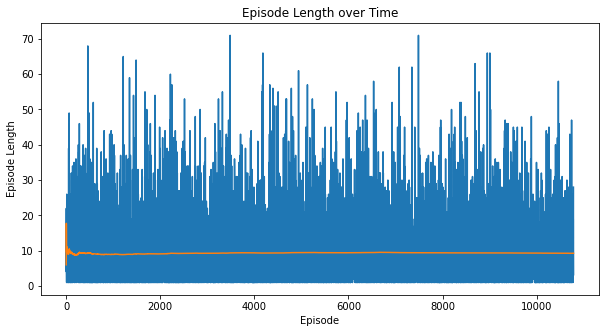

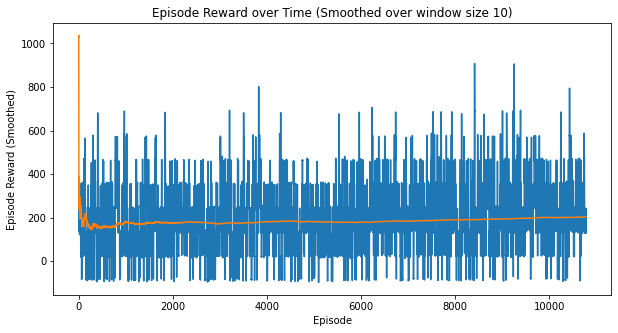

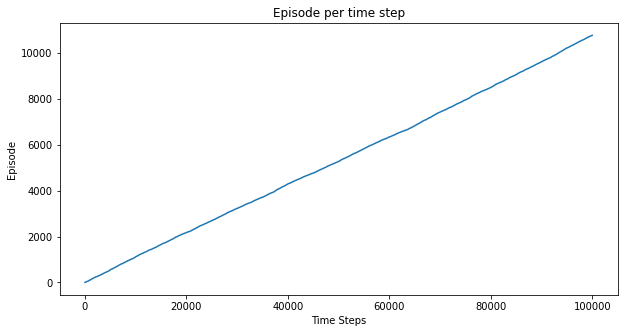

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [233]:
plot_history_stats(dueling_dqn_history)

## 4. Test Agent with Keras

In [15]:
def test_agent(agent, total_episodes, max_steps=100, learning_rate=0.5, gamma=0.9, epsilon=1.0, max_epsilon=1.0, min_epsilon=0.1, decay_rate=0.01):
    # List of rewards
    rewards = []

    # Testing the learned agent
    env.reset()

    # List of rewards
    rewards = []

    # For life or until learning is stopped
    for episode in range(total_episodes):
        state = env.reset()
        done = False 

        step = 0
        training_rewards = 0

        for step in range(max_steps):
            action = agent.forward(state)
            next_step, reward, done, _ = env.step(action)

            training_rewards += reward

            # If done : finish episode
            if done:
                break

            state = next_step

        rewards.append(training_rewards)

    print("Score over time: " + str(sum(rewards) / total_episodes))

**Train DQN**

In [235]:
total_episodes = 10000

In [236]:
test_agent(dqn_agent, total_episodes=total_episodes)

Score over time: 122.5646


In [237]:
test_agent(double_dqn_agent, total_episodes=total_episodes)

Score over time: 262.8115


In [238]:
test_agent(dueling_dqn_agent, total_episodes=total_episodes)

Score over time: 238.294


In [88]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import random
import gym
import numpy as np
from collections import deque
from keras.models import Model, load_model
from keras.layers import Dense, Conv2D, BatchNormalization, Dense, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop

def DQN_Model(input_shape, action_space):
    X_input = Input(input_shape)

    # 'Dense' is the basic form of a neural network layer
    # Input Layer of state size(4) and Hidden Layer with 512 nodes
    X = Dense(512, input_shape=input_shape, activation="relu", kernel_initializer='he_uniform')(X_input)

    # Hidden layer with 256 nodes
    X = Dense(256, activation="relu", kernel_initializer='he_uniform')(X)
    
    # Hidden layer with 64 nodes
    X = Dense(64, activation="relu", kernel_initializer='he_uniform')(X)

    # Output Layer with # of actions: 2 nodes (left, right)
    X = Dense(action_space, activation="linear", kernel_initializer='he_uniform')(X)

    model = Model(inputs = X_input, outputs = X, name='Minesweeper DQN model')
    model.compile(loss="mse", optimizer=RMSprop(lr=0.00025, rho=0.95, epsilon=0.01), metrics=["accuracy"])

    model.summary()
    return model


class DQN_Agent:
    def __init__(self):
        self.env = MinesweeperEnv(5, 5, 2)
        self.state_size = self.env.observation_space.shape[0] * self.env.observation_space.shape[1]
        self.action_size = self.env.action_space[0].n * self.env.action_space[1].n
        self.EPISODES = 300
        self.memory = deque(maxlen=2000)

        self.gamma = 0.95  # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.001
        self.epsilon_decay = 0.999
        self.batch_size = 64
        self.train_start = 1000

        # create main model
        self.model = DQN_Model(input_shape=(self.state_size,), action_space = self.action_size)

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
        if len(self.memory) > self.train_start:
            if self.epsilon > self.epsilon_min:
                self.epsilon *= self.epsilon_decay

    def act(self, state):
        if np.random.random() <= self.epsilon:
            return random.randrange(self.action_size)
        else:
            return np.argmax(self.model.predict(state))

    def replay(self):
        if len(self.memory) < self.train_start:
            return
        # Randomly sample minibatch from the memory
        minibatch = random.sample(self.memory, min(len(self.memory), self.batch_size))

        state = np.zeros((self.batch_size, self.state_size))
        next_state = np.zeros((self.batch_size, self.state_size))
        action, reward, done = [], [], []

        # do this before prediction
        # for speedup, this could be done on the tensor level
        # but easier to understand using a loop
        for i in range(self.batch_size):
            state[i] = minibatch[i][0]
            action.append(minibatch[i][1])
            reward.append(minibatch[i][2])
            next_state[i] = minibatch[i][3]
            done.append(minibatch[i][4])

        # do batch prediction to save speed
        target = self.model.predict(state)
        target_next = self.model.predict(next_state)

        for i in range(self.batch_size):
            # correction on the Q value for the action used
            if done[i]:
                target[i][action[i]] = reward[i]
            else:
                # Standard - DQN
                # DQN chooses the max Q value among next actions
                # selection and evaluation of action is on the target Q Network
                # Q_max = max_a' Q_target(s', a')
                target[i][action[i]] = reward[i] + self.gamma * (np.amax(target_next[i]))

        # Train the Neural Network with batches
        self.model.fit(state, target, batch_size=self.batch_size, verbose=0)

    def load(self, name):
        self.model = load_model(name)

    def save(self, name):
        self.model.save(name)

    def run(self):
        for e in range(self.EPISODES):
            state = self.env.reset()
            state = np.reshape(state, [1, self.state_size])
            done = False
            i = 0
            while not done:
                #self.env.render()
                action = self.act(state)
                next_state, reward, done, _ = self.env.step(action)
                next_state = np.reshape(next_state, [1, self.state_size])
                self.remember(state, action, reward, next_state, done)
                state = next_state
                i += 1
                if done:
                    print("episode: {}/{}, timestep: {}, e: {:.2}".format(e, self.EPISODES, i, self.epsilon))
                    break
                if i == self.EPISODES:
                    print("Saving trained model as minesweeper-dqn.h5")
                    self.save("minesweeper-dqn.h5")
                    return
                self.replay()

    def test(self):
        self.load("minesweeper-dqn.h5")
        for e in range(self.EPISODES):
            state = self.env.reset()
            state = np.reshape(state, [1, self.state_size])
            done = False
            i = 0
            while not done:
                #self.env.render()
                action = np.argmax(self.model.predict(state))
                next_state, reward, done, _ = self.env.step(action)
                state = np.reshape(next_state, [1, self.state_size])
                i += 1
                if done:
                    print("episode: {}/{}, timestep: {}".format(e, self.EPISODES, i))
                    break

In [89]:
agent = DQN_Agent()

Model: "Minesweeper DQN model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 25)]              0         
                                                                 
 dense_40 (Dense)            (None, 512)               13312     
                                                                 
 dense_41 (Dense)            (None, 256)               131328    
                                                                 
 dense_42 (Dense)            (None, 64)                16448     
                                                                 
 dense_43 (Dense)            (None, 25)                1625      
                                                                 
Total params: 162,713
Trainable params: 162,713
Non-trainable params: 0
_________________________________________________________________


/home/qubka/.local/lib/python3.10/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [90]:
agent.run()

episode: 0/300, timestep: 2, e: 1.0
episode: 1/300, timestep: 9, e: 1.0
episode: 2/300, timestep: 22, e: 1.0
episode: 3/300, timestep: 23, e: 1.0
episode: 4/300, timestep: 2, e: 1.0
episode: 5/300, timestep: 19, e: 1.0
episode: 6/300, timestep: 23, e: 1.0
episode: 7/300, timestep: 3, e: 1.0
episode: 8/300, timestep: 12, e: 1.0
episode: 9/300, timestep: 7, e: 1.0
episode: 10/300, timestep: 1, e: 1.0
episode: 11/300, timestep: 1, e: 1.0
episode: 12/300, timestep: 3, e: 1.0
episode: 13/300, timestep: 2, e: 1.0
episode: 14/300, timestep: 2, e: 1.0
episode: 15/300, timestep: 9, e: 1.0
episode: 16/300, timestep: 7, e: 1.0
episode: 17/300, timestep: 25, e: 1.0
episode: 18/300, timestep: 1, e: 1.0
episode: 19/300, timestep: 9, e: 1.0
episode: 20/300, timestep: 7, e: 1.0
episode: 21/300, timestep: 8, e: 1.0
episode: 22/300, timestep: 9, e: 1.0
episode: 23/300, timestep: 8, e: 1.0
episode: 24/300, timestep: 18, e: 1.0
episode: 25/300, timestep: 9, e: 1.0
episode: 26/300, timestep: 13, e: 1.0
epi

/home/qubka/.local/lib/python3.10/site-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


episode: 107/300, timestep: 15, e: 1.0
episode: 108/300, timestep: 10, e: 0.99
episode: 109/300, timestep: 2, e: 0.98
episode: 110/300, timestep: 11, e: 0.97
episode: 111/300, timestep: 1, e: 0.97
episode: 112/300, timestep: 15, e: 0.96
episode: 113/300, timestep: 14, e: 0.94
episode: 114/300, timestep: 12, e: 0.93
episode: 115/300, timestep: 2, e: 0.93
episode: 116/300, timestep: 1, e: 0.93
episode: 117/300, timestep: 13, e: 0.92
episode: 118/300, timestep: 22, e: 0.9
episode: 119/300, timestep: 8, e: 0.89
episode: 120/300, timestep: 9, e: 0.88
episode: 121/300, timestep: 11, e: 0.87
episode: 122/300, timestep: 14, e: 0.86
episode: 123/300, timestep: 2, e: 0.86
episode: 124/300, timestep: 2, e: 0.86
episode: 125/300, timestep: 17, e: 0.84
episode: 126/300, timestep: 25, e: 0.82
episode: 127/300, timestep: 3, e: 0.82
episode: 128/300, timestep: 16, e: 0.81
episode: 129/300, timestep: 1, e: 0.81
episode: 130/300, timestep: 20, e: 0.79
episode: 131/300, timestep: 6, e: 0.78
episode: 132/

In [91]:
agent.test()

episode: 0/300, timestep: 25
episode: 1/300, timestep: 1
episode: 2/300, timestep: 25
episode: 3/300, timestep: 25
episode: 4/300, timestep: 25
episode: 5/300, timestep: 25
episode: 6/300, timestep: 25
episode: 7/300, timestep: 25
episode: 8/300, timestep: 25
episode: 9/300, timestep: 25
episode: 10/300, timestep: 25
episode: 11/300, timestep: 25
episode: 12/300, timestep: 25
episode: 13/300, timestep: 25
episode: 14/300, timestep: 25
episode: 15/300, timestep: 25
episode: 16/300, timestep: 25
episode: 17/300, timestep: 1
episode: 18/300, timestep: 25
episode: 19/300, timestep: 25
episode: 20/300, timestep: 1
episode: 21/300, timestep: 25
episode: 22/300, timestep: 25
episode: 23/300, timestep: 25
episode: 24/300, timestep: 25
episode: 25/300, timestep: 25
episode: 26/300, timestep: 1
episode: 27/300, timestep: 1
episode: 28/300, timestep: 25
episode: 29/300, timestep: 25
episode: 30/300, timestep: 25
episode: 31/300, timestep: 25
episode: 32/300, timestep: 25
episode: 33/300, timestep

episode: 269/300, timestep: 25
episode: 270/300, timestep: 25
episode: 271/300, timestep: 25
episode: 272/300, timestep: 25
episode: 273/300, timestep: 25
episode: 274/300, timestep: 25
episode: 275/300, timestep: 25
episode: 276/300, timestep: 25
episode: 277/300, timestep: 1
episode: 278/300, timestep: 25
episode: 279/300, timestep: 25
episode: 280/300, timestep: 25
episode: 281/300, timestep: 25
episode: 282/300, timestep: 1
episode: 283/300, timestep: 25
episode: 284/300, timestep: 25
episode: 285/300, timestep: 25
episode: 286/300, timestep: 25
episode: 287/300, timestep: 1
episode: 288/300, timestep: 25
episode: 289/300, timestep: 25
episode: 290/300, timestep: 25
episode: 291/300, timestep: 25
episode: 292/300, timestep: 1
episode: 293/300, timestep: 1
episode: 294/300, timestep: 25
episode: 295/300, timestep: 25
episode: 296/300, timestep: 25
episode: 297/300, timestep: 25
episode: 298/300, timestep: 25
episode: 299/300, timestep: 25


# Replay Buffer for Experience replay

In [150]:
SIZE_ENVIR = 5
MINES_COUNT = 2

In [151]:
from collections import namedtuple

Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward'))

In [182]:
def convert_state(state):
    
    state_tensor = state.flatten()
    state_tensor = torch.tensor(state_tensor, device=device).unsqueeze(0)
    
    return state_tensor
    

class ReplayMemory:

    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.position = 0

    def push(self, state, action, next_state, reward):
        """Saves a transition."""
        if len(self.memory) < self.capacity:
            self.memory.append(None)
        
        state_tensor = convert_state(state)
        
        if next_state is None:
            state_tensor_next = None            
        else:
            state_tensor_next = convert_state(next_state)
            
        action_tensor = torch.tensor([action], device=device).unsqueeze(0)

        reward = torch.tensor([reward], device=device).unsqueeze(0)/10. # reward scaling

        self.memory[self.position] = Transition(state_tensor, action_tensor, state_tensor_next, reward)
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

# Q-network

In [183]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class DQN(nn.Module):

    def __init__(self, input_size, size_hidden, output_size):
        
        super().__init__()
        
        self.fc1 = nn.Linear(input_size, size_hidden)
        self.bn1 = nn.BatchNorm1d(size_hidden)
        
        self.fc2 = nn.Linear(size_hidden, size_hidden)   
        self.bn2 = nn.BatchNorm1d(size_hidden)

        self.fc3 = nn.Linear(size_hidden, size_hidden)  
        self.bn3 = nn.BatchNorm1d(size_hidden)

        self.fc4 = nn.Linear(size_hidden, output_size)
        
        
    def forward(self, x):
        h1 = F.relu(self.bn1(self.fc1(x.float())))
        h2 = F.relu(self.bn2(self.fc2(h1)))
        h3 = F.relu(self.bn3(self.fc3(h2)))
        output = self.fc4(h3.view(h3.size(0), -1))
        return output
    

# Set up the Q-networks

In [184]:
OBS_SIZE = 5*5
HIDDEN_SIZE = 12
ACTION_SIZE = 5*5

Q_network = DQN(OBS_SIZE, HIDDEN_SIZE, ACTION_SIZE).to(device)
Q_target = DQN(OBS_SIZE, HIDDEN_SIZE, ACTION_SIZE).to(device)
Q_target.load_state_dict(Q_network.state_dict())
Q_target.eval()

TARGET_UPDATE = 100

optimizer = optim.SGD(Q_network.parameters(), lr=0.001)
memory = ReplayMemory(10000)

# Epsilon-greedy policy

In [185]:
class E_Greedy_Policy():
    
    def __init__(self, epsilon, decay, min_epsilon):
        
        self.epsilon = epsilon
        self.epsilon_start = epsilon
        self.decay = decay
        self.epsilon_min = min_epsilon
                
    def __call__(self, state):
                
        is_greedy = random.random() > self.epsilon
        
        if is_greedy :
            # we select greedy action
            with torch.no_grad():
                Q_network.eval()
                index_action = Q_network(state).max(1)[1].view(1, 1).numpy()[0][0]
                Q_network.train()
        else:
            # we sample a random action
            index_action = random.randint(0,3)
        
        return index_action
                
    def update_epsilon(self):
        
        self.epsilon = self.epsilon*self.decay
        if self.epsilon < self.epsilon_min:
            self.epsilon = self.epsilon_min
        
    def reset(self):
        self.epsilon = self.epsilon_start
        
        
policy = E_Greedy_Policy(0.99, decay=0.999, min_epsilon=0.001)

# Training loop

In [186]:
BATCH_SIZE = 256
GAMMA = 0.5

def optimize_model():
    
    transitions = memory.sample(BATCH_SIZE)
    batch = Transition(*zip(*transitions))

    # Compute a mask of non-final states and concatenate the batch elements
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)
    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None])
    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)
    
    # Compute Q values using policy net
    Q_values = Q_network(state_batch).gather(1, action_batch)

    # Compute next Q values using Q_targets
    next_Q_values = torch.zeros( BATCH_SIZE, device=device)
    next_Q_values[non_final_mask] = Q_target(non_final_next_states).max(1)[0].detach()
    next_Q_values = next_Q_values.unsqueeze(1)
    
    # Compute targets
    target_Q_values = (next_Q_values * GAMMA) + reward_batch
    
    # Compute MSE Loss
    loss = F.mse_loss(Q_values, target_Q_values)
    
    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    
    # Trick: gradient clipping
    for param in Q_network.parameters():
        param.grad.data.clamp_(-1, 1)
        
    optimizer.step()
    
    return loss

In [187]:
num_episodes = 1000

policy.reset()

rewards_history = []

# Warmup phase!
memory_filled = False

while not memory_filled:
    
    my_minesweeper = MinesweeperEnv(SIZE_ENVIR, SIZE_ENVIR, MINES_COUNT)
    state = my_minesweeper.reset()
    done = False
    
    total_reward = 0
    
    while not done:
        
        # Get action and act in the world
        state_tensor = convert_state(state)
        
        action = policy(state_tensor)
        next_state, reward, done, _ = my_minesweeper.step(action)
        
        total_reward += reward
        
        # Observe new state
        if done:
            next_state = None

        # Store the transition in memory
        memory.push(state, action, next_state, reward)
        
        state = next_state


    memory_filled = memory.capacity == len(memory)

print('Done with the warmup')
    
    
for i_episode in range(num_episodes):
    
    # New dungeon at every run
    my_minesweeper = MinesweeperEnv(SIZE_ENVIR, SIZE_ENVIR, MINES_COUNT)
    state = my_minesweeper.reset()
    done = False
    
    total_reward = 0
    
    while not done:
        
        # Get action and act in the world
        state_tensor = convert_state(state)
        
        action = policy(state_tensor)
        next_state, reward, done, _ = my_minesweeper.step(action)
        
        total_reward += reward
        
        # Observe new state
        if done:
            next_state = None

        # Store the transition in memory
        memory.push(state, action, next_state, reward)

        # Move to the next state
        state = next_state

        # Perform one step of the optimization
        started_training = True
        l = optimize_model()

    policy.update_epsilon()
    rewards_history.append(total_reward)

    
    # Update the target network, copying all weights and biases in DQN
    if i_episode % TARGET_UPDATE == 0:

        Q_target.load_state_dict(Q_network.state_dict())
    
    if (i_episode) % 10 == 0:
        print('Episode ', i_episode, ': ', 
              'reward :',  total_reward, 'eps: ', policy.epsilon, ' loss:', l.detach().cpu())   
        print(sum(rewards_history[-10:]) / 10)    

print('Complete')


Done with the warmup
Episode  0 :  reward : -113 eps:  0.98901  loss: tensor(120.5145)
-11.3
Episode  10 :  reward : -113 eps:  0.9791642869762429  loss: tensor(41.1984)
123.2
Episode  20 :  reward : -100 eps:  0.969416589205058  loss: tensor(4.8720)
-95.9
Episode  30 :  reward : -80 eps:  0.9597659309328644  loss: tensor(5.1247)
14.9
Episode  40 :  reward : 1000 eps:  0.9502113461198253  loss: tensor(43.3122)
235.6
Episode  50 :  reward : -78 eps:  0.940751878343146  loss: tensor(82.9406)
-92.0
Episode  60 :  reward : -90 eps:  0.9313865807013356  loss: tensor(71.6722)
123.3
Episode  70 :  reward : -80 eps:  0.9221145157194209  loss: tensor(76.4200)
123.9
Episode  80 :  reward : 1000 eps:  0.9129347552551041  loss: tensor(65.6055)
235.3
Episode  90 :  reward : -113 eps:  0.9038463804058553  loss: tensor(111.1712)
-95.4
Episode  100 :  reward : -113 eps:  0.8948484814169296  loss: tensor(160.6130)
118.9
Episode  110 :  reward : -69 eps:  0.8859401575902992  loss: tensor(6.4179)
234.7
E

Complete


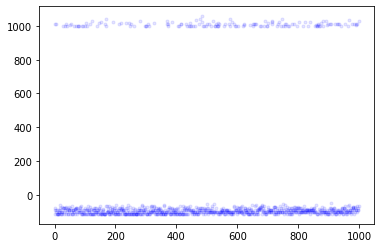

In [188]:
plt.plot(rewards_history, 'b.', alpha=.1)